C:\Users\Sajede Harraz\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


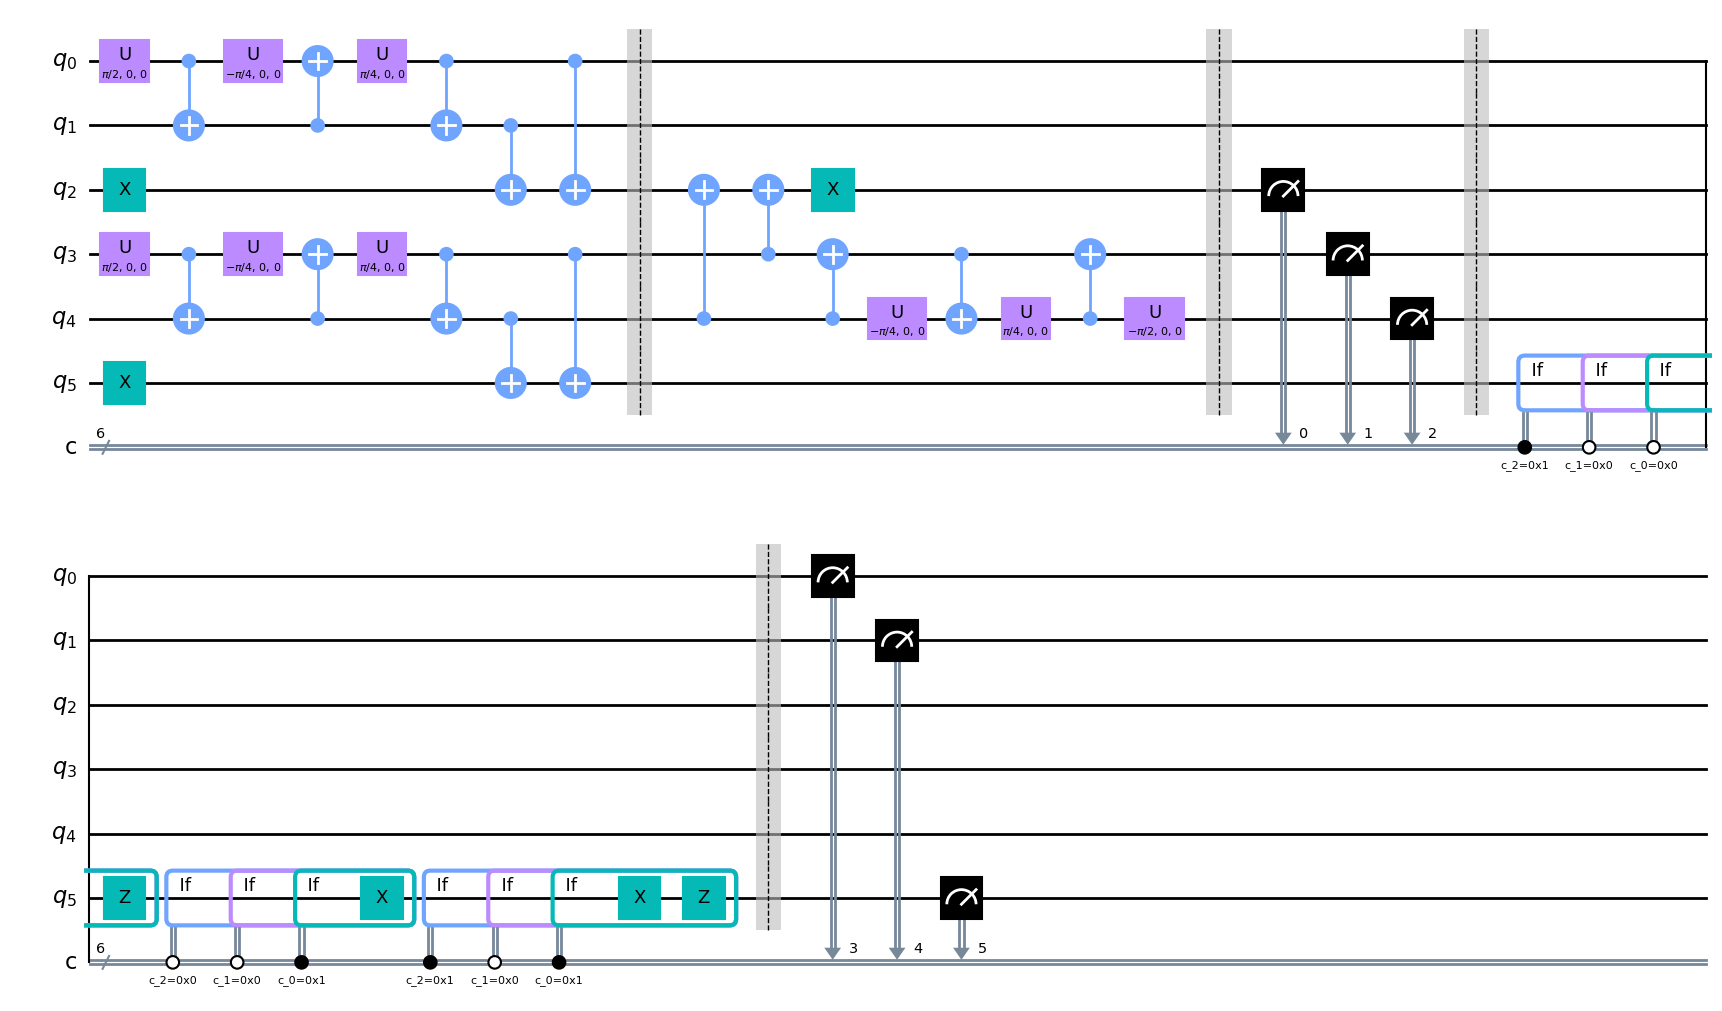

In [2]:
import numpy as np
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import math
from math import pi
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import amplitude_damping_error, NoiseModel, depolarizing_error, ReadoutError

circ = QuantumCircuit(6,6)
#Preparation of the first W state:
circ.u(pi/2,0,0,0)
circ.x(2)
circ.cx(0, 1)
circ.u(-pi/4,0,0,0)
circ.cx(1, 0)
circ.u(pi/4,0,0,0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.cx(0, 2)
#Preparation of the second W state:
circ.u(pi/2,0,0,3)
circ.x(5)
circ.cx(3, 4)
circ.u(-pi/4,0,0,3)
circ.cx(4, 3)
circ.u(pi/4,0,0,3)
circ.cx(3, 4)
circ.cx(4, 5)
circ.cx(3, 5)

circ.barrier()
#Entanglement swapping process:
circ.cx(4,2)
circ.cx(3,2)
circ.cx(4,3)
circ.u(-pi/4,0,0,4)
circ.cx(3,4)
circ.u(pi/4,0,0,4)
circ.cx(4,3)
circ.x(2)
circ.u(-pi/2,0,0,4)

circ.barrier()
#Measuring qubits at Charlie's location:
circ.measure([2, 3, 4], [0, 1, 2])
circ.barrier()
#Employing corresponding operations according to the results of the Charlie's measurement:
with circ.if_test((2, 1)):
    with circ.if_test((1, 0)):
        with circ.if_test((0, 0)):
            circ.z(5) 

with circ.if_test((2, 0)):
    with circ.if_test((1, 0)):
        with circ.if_test((0, 1)):
            circ.x(5)
            
with circ.if_test((2, 1)):
    with circ.if_test((1, 0)):
        with circ.if_test((0, 1)):
            circ.x(5)       
            circ.z(5)                                
circ.barrier()

################
#Depolarizing error of CNOT gate:
error_rate_cnot =0.02# Adjust this value based on the desired error rate

# Create a depolarizing error for the CNOT gate
cnot_error = depolarizing_error(error_rate_cnot, 2)

# Create a noise model and add the CNOT error to it for the specified qubits
noise_model = NoiseModel()
noise_model.add_quantum_error(cnot_error, 'cx', [0,1])
noise_model.add_quantum_error(cnot_error, 'cx', [1,2])
noise_model.add_quantum_error(cnot_error, 'cx', [3,2])
noise_model.add_quantum_error(cnot_error, 'cx', [3,4])
noise_model.add_quantum_error(cnot_error, 'cx', [4,5])
noise_model.add_quantum_error(cnot_error, 'cx', [0,2])
noise_model.add_quantum_error(cnot_error, 'cx', [3,5])
noise_model.add_quantum_error(cnot_error, 'cx', [4,2])
noise_model.add_quantum_error(cnot_error, 'cx', [1,0])
noise_model.add_quantum_error(cnot_error, 'cx', [4,3])

###############
##reaad out error
eta=0.02# Adjust this value based on the desired readout error rate
error_meas = ReadoutError([[1- eta, eta], [eta, 1- eta]])
noise_model.add_readout_error(error_meas, [2])
noise_model.add_readout_error(error_meas, [3]) 
noise_model.add_readout_error(error_meas, [4]) 

###############
circ.measure([0,1,5], [3,4,5])
circ.draw('mpl')

In [3]:
circ=circ.reverse_bits ()
Shots_n=10000
method = "statevector"
backend = AerSimulator(method="statevector")
job = backend.run(circ, method=method, noise_model=noise_model,shots=Shots_n)  # Run the simulation
result = job.result()  # Get the simulation result

counts = result.get_counts()  # Get the measurement counts
print(counts)

{'111111': 2, '100001': 1088, '001010': 532, '101001': 1137, '110110': 2, '101010': 539, '000001': 1124, '001001': 1143, '111110': 1, '001011': 33, '100010': 556, '110100': 1, '000011': 54, '101100': 525, '101101': 16, '110011': 27, '000100': 543, '111100': 1, '001101': 16, '100100': 574, '100011': 45, '111101': 28, '001100': 588, '111001': 12, '110101': 29, '000010': 564, '101011': 38, '100111': 7, '101111': 12, '000110': 23, '110001': 6, '001111': 13, '111010': 9, '100110': 14, '001000': 55, '011001': 55, '101000': 46, '010001': 53, '111000': 68, '000111': 18, '110000': 58, '100000': 46, '011010': 34, '010100': 36, '001110': 10, '100101': 18, '111011': 35, '011100': 22, '000000': 46, '011000': 5, '010110': 3, '010010': 32, '011101': 6, '010101': 5, '110010': 2, '101110': 15, '000101': 19, '011011': 5, '010111': 1, '010000': 3, '011110': 1, '011111': 1}


2328
fidelity= 0.9451665415289424


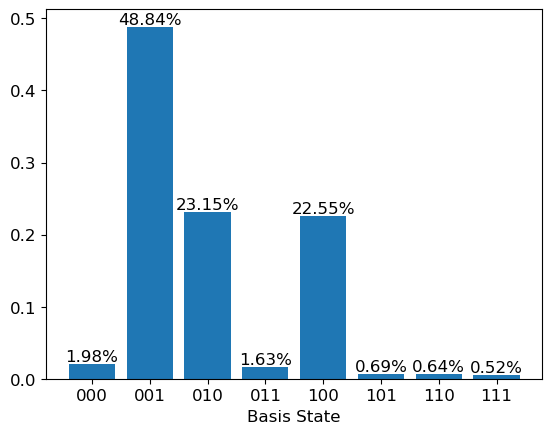

In [9]:
success, fail = 0, 0
Bell_states = {}
Bell_new = {}

for jj in counts:  
    #if jj[0] == jj[1] == jj[2]=='0': #Results corresponidng to \eta+
    #if jj[0] == jj[1]=='0' and jj[2]=='1':  #Results corresponidng to \eta-
    #if jj[1] == jj[2]=='0' and jj[0]=='1':  #Results corresponidng to \xi+
    if jj[0] == jj[2]=='1' and jj[1]=='0':  #Results corresponidng to \xi-
        success += counts[jj]
        Bell_state = jj
        if Bell_state in Bell_states:
            Bell_states[Bell_state] += counts[jj]
        else:
            Bell_states[Bell_state] = counts[jj]
    else:
        fail += counts[jj]

total = success + fail

# Extract the shared entangled qubits state and store it in Bell_new as a dictionary
for i in Bell_states:
    last_char = i[3:]
    if last_char in Bell_new:
        Bell_new[last_char] += Bell_states[i]
    else:
        Bell_new[last_char] = Bell_states[i]

print(success)

# Convert counts to a sorted list of probabilities
basis_states = ['000', '001', '010', '011', '100', '101', '110', '111']
probabilities = [Bell_new.get(state, 0) / success for state in basis_states]

#Finding probabilites for fidelity:
s22 = probabilities[basis_states.index('001')]
s33 = probabilities[basis_states.index('010')]
s55 = probabilities[basis_states.index('100')]
s35=np.sqrt(s33)*np.sqrt(s55)
s23=np.sqrt(s22)*np.sqrt(s33)
s25=np.sqrt(s22)*np.sqrt(s55)
fidelity=s22/2 + s33/4 + s35/2 + s55/4 + (np.sqrt(2)*s23)/2 + (np.sqrt(2)*s25)/2
print('fidelity=',fidelity)


# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)
plt.xlabel('Basis State', fontsize=12)

# Add percentage labels on top of each bar
for i, prob in enumerate(probabilities):
    plt.text(basis_states[i], prob, f'{prob * 100:.2f}%', ha='center', va='bottom', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()